In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


Preparing the dataset

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2

dataset = pd.read_csv('/content/gdrive/MyDrive/VLPR/dataset/dataset.csv', names = ['image_path', 'label'])
dataset['image'] = np.nan
images = []

for path in dataset['image_path']:
    if path[5] == 'm':
      path = '/content/gdrive/MyDrive/VLPR/dataset/normal/'+ path
    else:
      path = '/content/gdrive/MyDrive/VLPR/dataset/hdr/'+ path
    images.append(cv2.imread(path))

dataset['image'] = images
dataset.head()
#Saving file to local disc for future uses.
dataset.to_csv('/content/gdrive/MyDrive/VLPR/dataset/VLPR.csv')

In [6]:
dataset.head()

,image_path,label,image
0,crop_m1/I00000.png,9B52145,"[[[29, 21, 14], [30, 22, 15], [30, 22, 15], [3..."
1,crop_h1/I00000.png,9B52145,"[[[76, 55, 47], [78, 58, 47], [80, 60, 49], [8..."
2,crop_m1/I00001.png,6B94558,"[[[30, 29, 127], [30, 29, 125], [29, 28, 124],..."
3,crop_h1/I00001.png,6B94558,"[[[102, 100, 254], [98, 97, 253], [97, 96, 254..."
4,crop_m1/I00002.png,8B90164,"[[[85, 71, 59], [88, 74, 62], [88, 74, 62], [8..."


DATA PROCESSING

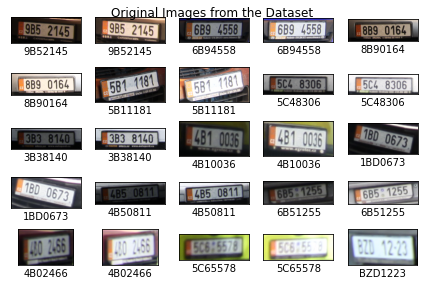

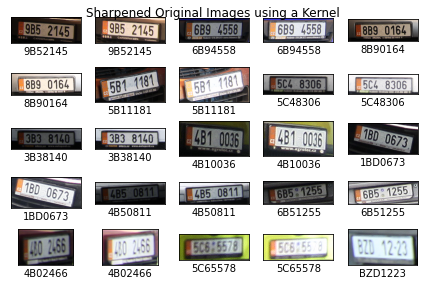

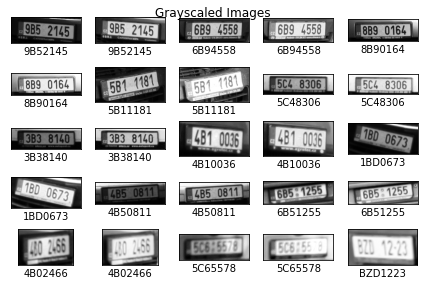

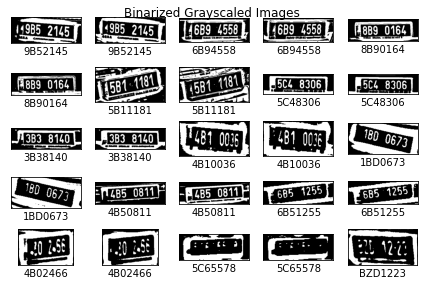

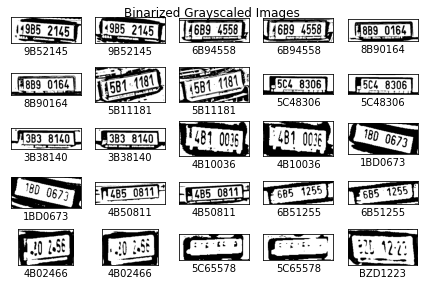

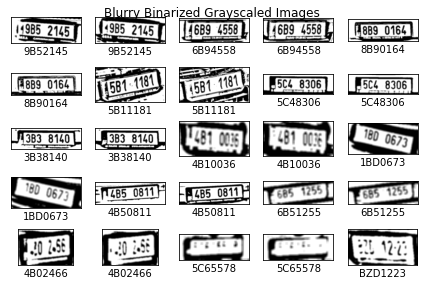

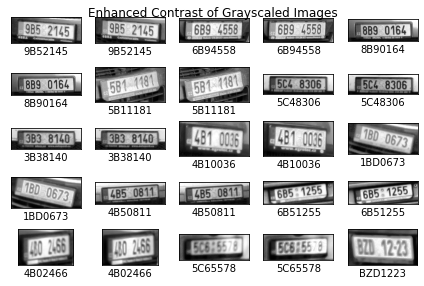

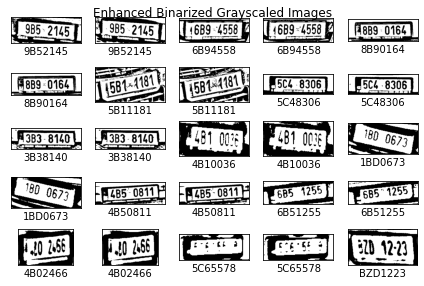

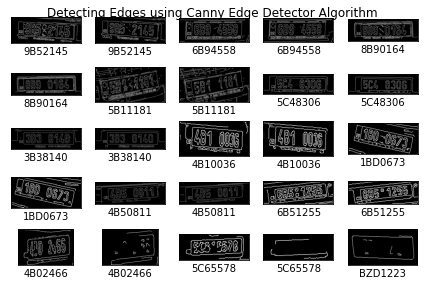

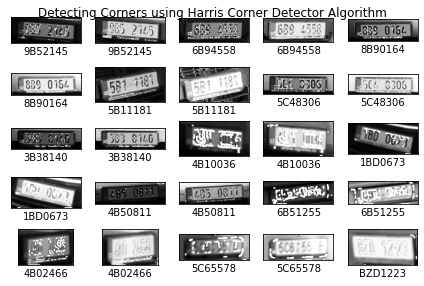

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import glob
import cv2
import matplotlib
from PIL import Image
from imutils import contours
import os

fig = plt.gcf()
fig.suptitle("Actual Images from the Dataset", fontsize=12)
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(dataset['image'][i])
    plt.xlabel(dataset['label'][i])
plt.tight_layout()
plt.show()

# Sharpening the actual images using a Kernel for better illuminations.

kernel = np.array([[0, -1, 0],
 [-1, 5,-1],
 [0, -1, 0]])

sharp_images = []

sharp_images = [cv2.filter2D(image, -1, kernel) for image in images]

fig = plt.gcf()
fig.suptitle("Sharpened Actual Images using a Kernel", fontsize=12)
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(sharp_images[i])
    plt.xlabel(dataset['label'][i])
plt.tight_layout()
plt.show()

# Grayscaling the Images

gray_images = [cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in images]

fig = plt.gcf()
fig.suptitle("Grayscaled Images", fontsize=12)
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(gray_images[i], "gray")
    plt.xlabel(dataset['label'][i])
plt.tight_layout()
plt.show()

# Applying Binarization Technique

max_output_value = 255
neighborhood_size = 99
subtract_from_mean = 10

binarized_images = []

binarized_images = [cv2.adaptiveThreshold(image, max_output_value,
                                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY,
                                        neighborhood_size,
                                        subtract_from_mean) for image in gray_images]

fig = plt.gcf()
fig.suptitle("Binarized Grayscaled Images", fontsize=12)
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(binarized_images[i], "binary")
    plt.xlabel(dataset['label'][i])
plt.tight_layout()
plt.show()

fig = plt.gcf()
fig.suptitle("Binarized Grayscaled Images", fontsize=12)
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(binarized_images[i], "gray")
    plt.xlabel(dataset['label'][i])
plt.tight_layout()
plt.show()

# Blurring the Binarized Grayscaled Images

blurry_images = []

blurry_images = [cv2.blur(image, (5,5)) for image in binarized_images]

fig = plt.gcf()
fig.suptitle("Blurry Binarized Grayscaled Images", fontsize=12)
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(blurry_images[i], "gray")
    plt.xlabel(dataset['label'][i])
plt.tight_layout()
plt.show()

# Enhancing Contrast of the Grayscaled Images

enhanced_images = []

enhanced_images = [cv2.equalizeHist(image) for image in gray_images]

fig = plt.gcf()
fig.suptitle("Enhanced Contrast of Grayscaled Images", fontsize=12)
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(enhanced_images[i], "gray")
    plt.xlabel(dataset['label'][i])
plt.tight_layout()
plt.show()

# Enhancing Binarized Grayscaled Images

max_output_value = 255
neighborhood_size = 99
subtract_from_mean = 10

enhanced_binarized_images = []

enhanced_binarized_images = [cv2.adaptiveThreshold(image, max_output_value,
                                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY,
                                        neighborhood_size,
                                        subtract_from_mean) for image in enhanced_images]

fig = plt.gcf()
fig.suptitle("Enhanced Binarized Grayscaled Images", fontsize=12)
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(enhanced_binarized_images[i], "gray")
    plt.xlabel(dataset['label'][i])
plt.tight_layout()
plt.show()


# Detecting Edges using Canny Edge Detector

image_edges = []

for i in range(len(gray_images)):
    median_intensity = np.median(gray_images[i])
    
    lower_threshold = int(max(0, (1.0 - 0.33) * median_intensity))
    upper_threshold = int(min(255, (1.0 + 0.33) * median_intensity))
    
    image_canny = cv2.Canny(gray_images[i], lower_threshold, upper_threshold)
    image_edges.append(image_canny)

fig = plt.gcf()
fig.suptitle("Detecting Edges using Canny Edge Detector Algorithm", fontsize=12)
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image_edges[i], "gray")
    plt.xlabel(dataset['label'][i])
plt.tight_layout()
plt.show()


# Detecting Corners using Harris Corner Detector

image_corners = []

for i in range(len(images)):

    block_size = 2
    aperture = 29
    free_parameter = 0.04
    
    detector_responses = cv2.cornerHarris(gray_images[i], block_size, aperture, free_parameter)
    
    detector_responses = cv2.dilate(detector_responses, None)
    
    threshold = 0.02
    images[i][detector_responses > threshold * detector_responses.max()] = [255,255,255]
    image_gray = cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY)
    image_corners.append(image_gray)

                             
fig = plt.gcf()
fig.suptitle("Detecting Corners using Harris Corner Detector Algorithm", fontsize=12)
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image_corners[i], "gray")
    plt.xlabel(dataset['label'][i])
plt.tight_layout()
plt.show()

Saving Images on to Disc

In [ ]:
import glob
import cv2
import matplotlib
from PIL import Image
from imutils import contours
import os

for i in range(len(gray_images)):
    im = Image.fromarray(gray_images[i])
    im.save('/content/gdrive/MyDrive/VLPR/results/grayscaled/{}.png'.format(i))

    
for i in range(len(enhanced_images)):
    im = Image.fromarray(enhanced_images[i])
    im.save('/content/gdrive/MyDrive/VLPR/results/enhanced_images/{}.png'.format(i))
    
for i in range(len(enhanced_binarized_images)):
    im = Image.fromarray(enhanced_binarized_images[i])
    im.save('/content/gdrive/MyDrive/VLPR/results/enhanced_binarized_images/{}.png'.format(i))
    
for i in range(len(sharp_images)):
    im = Image.fromarray(sharp_images[i])
    im.save('/content/gdrive/MyDrive/VLPR/results/sharpened/{}.png'.format(i))

for i in range(len(blurry_images)):
    im = Image.fromarray(blurry_images[i])
    im.save('/content/gdrive/MyDrive/VLPR/results/blurry/{}.png'.format(i))
    
for i in range(len(image_edges)):
    im = Image.fromarray(image_edges[i])
    im.save('/content/gdrive/MyDrive/VLPR/results/edge/{}.png'.format(i))
    
for i in range(len(image_corners)):
    im = Image.fromarray(image_corners[i])
    im.save('/content/gdrive/MyDrive/VLPR/results/corner/{}.png'.format(i))


Creating Bounding Box and Segmenting Characters

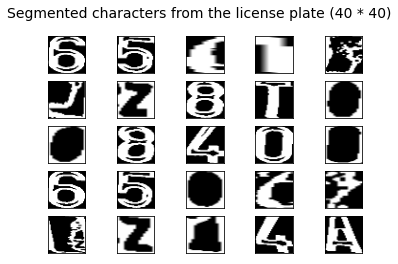

In [ ]:


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import glob
import cv2
import matplotlib
from PIL import Image
from imutils import contours
import os


bi = [cv2.imread(file) for file in glob.glob('/content/gdrive/MyDrive/VLPR/results/enhanced_binarized_images/*.png')]


for i in range(len(bi)):
    im = bi[i]
    im3 = im.copy()

    gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),0)
    thresh = cv2.adaptiveThreshold(blur,255,1,1,11,2)
        
    contours_,hierarchy = cv2.findContours(thresh,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
    (contours_, _) = contours.sort_contours(contours_, method="left-to-right")
    samples =  np.empty((0,100))
    responses = []
    keys = [i for i in range(48,58)]
    ROI_number = 0
    for cnt in contours_:
        if cv2.contourArea(cnt)>50:
            [x,y,w,h] = cv2.boundingRect(cnt)
    
            if  h>28:
                cv2.rectangle(im,(x,y),(x+w,y+h),(0,0,255),2)
                roi = thresh[y:y+h,x:x+w]
                # print(roi.shape)
                if (roi.shape[1] < 80):
                    roismall = cv2.resize(roi,(40,40))
                    cv2.imwrite('/content/gdrive/MyDrive/VLPR/results/extracted_images/image_{}_ROI_{}.png'.format(i, ROI_number), roismall)
                    ROI_number += 1 
                    
                
       
    img = Image.fromarray(im)
    img.save('/content/gdrive/MyDrive/VLPR/results/bounding_box_markup/{}.png'.format(i))


# Visualizing some segmented characters of 40 * 40 dimension from the license plate
    
segmented_characters = [cv2.imread(file) for file in glob.glob('/content/gdrive/MyDrive/VLPR/results/extracted_images/*.png')]

fig = plt.gcf()
fig.suptitle("Segmented characters from the license plate (40 * 40)", fontsize=14)
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(segmented_characters[i])
plt.show()

Applying K Means Clustering Algo on Segmented Characters

10599


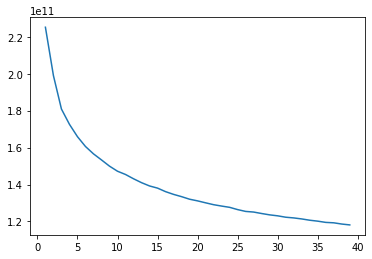

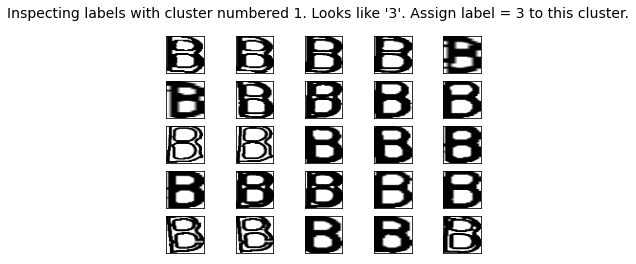

In [ ]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import glob
import cv2
import matplotlib
from PIL import Image
from imutils import contours
import os

from sklearn.cluster import KMeans

segmented_characters = [cv2.imread(file) for file in glob.glob('/content/gdrive/MyDrive/VLPR/results/extracted_images/*.png')]
segmented_characters = np.array(segmented_characters)

gray_segmented_characters = [cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in segmented_characters]
gray_segmented_characters = np.array(gray_segmented_characters)

# print(gray_segmented_characters.shape[0])

gray_segmented_characters = gray_segmented_characters.reshape(gray_segmented_characters.shape[0], 1600)

# Using within cluster variation to determine optimal number of clusters
# This code has to be executed multiple times to generate correct clusters
# Filter out all the unique characters and save them in a separate directory

wcv = []

for i in range(1, 40):
    km = KMeans(n_clusters = i)
    km.fit(gray_segmented_characters)
    wcv.append(km.inertia_)

plt.plot(range(1, 40), wcv)
plt.show()

km = KMeans(n_clusters = 31)
y_pred = km.fit_predict(gray_segmented_characters)

test_label = gray_segmented_characters[y_pred == 0]

fig = plt.gcf()
fig.suptitle("Inspecting labels with cluster numbered 1. Looks like '3'. Assign label = 3 to this cluster.", fontsize=14)
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    im = test_label[i]
    im = im.reshape(40, 40)
    plt.imshow(im, "binary")
plt.show()

Labelling the Clusters from K Means with appropriate labels and saving them in the local Disc

In [ ]:
for label in range(31):
  test_label = gray_segmented_characters[y_pred == label]

  test_label = test_label.reshape((test_label.shape[0], 40, 40))

  for i in range(len(test_label)):
      im = Image.fromarray(test_label[i])
      path = '/content/gdrive/MyDrive/VLPR/results/numbers/' + str(label)
      # print(os.path.isdir(path))
      if os.path.isdir(path) == False:
        os.mkdir(path)
      im.save(path +'/{}.png'.format(i))

Training and Testing Sequential Model for Recognition of Characters in License plate

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import cv2
from PIL import Image
from imutils import contours
import os
import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import LearningRateScheduler,ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

images = []
labels = []

for i in range(10):
    im = [cv2.imread(file) for file in glob.glob('/content/gdrive/MyDrive/VLPR/results/nums_and_chars/{}/*.png'.format(i))]
    print(i)
    print(len(im))
    im = np.array(im)
    images.append(im)
    labels.append([i] * len(im))

   
loop_var = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 
            'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'z']

refined_loop_var = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 
            'K', 'L', 'M', 'N', 'O', 'P', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Z']

loop_map = pd.DataFrame()
loop_map['key'] = np.arange(0, 34)
loop_map['value'] = refined_loop_var

count = 10

for i in loop_var:
    im = [cv2.imread(file) for file in glob.glob('/content/gdrive/MyDrive/VLPR/results/nums_and_chars/{}/*.png'.format(i))]
    print(i, len(im))
    im = np.array(im)
    images.append(im)
    labels.append([count] * len(im))
    count += 1

import operator
from functools import reduce
label = reduce(operator.concat, labels)

y = np.array(label)
X = images[0]
 
for i in range(1, 34):
    X = np.concatenate([X, images[i]])
    
np.save('/content/gdrive/MyDrive/VLPR/results/image_array', X)
np.save('/content/gdrive/MyDrive/VLPR/results/image_label', y)

X = X.astype('float64') / 255.0

# Splitting the dataset into train set, test set and validation set
# The split ratio selected is 80:20

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 1)



reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', 
                                patience=3, 
                                verbose=1, 
                                factor=0.2, 
                                min_lr=1e-6)

# Model architecture

model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = [40, 40, 3]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, kernel_size = 3, activation = 'relu', padding = 'same'),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', padding = 'same'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, kernel_size = 3, activation = 'relu', padding = 'same'),
    keras.layers.MaxPool2D(),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(256, activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(34, activation = 'softmax')])

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'nadam', metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs = 20, validation_data = (X_valid, y_valid),
                    callbacks = [reduce_lr], batch_size = 32)

model.save('/content/gdrive/MyDrive/VLPR/results/my_model_version1')

model.evaluate(X_test, y_test)

0
271
1
433
2
377
3
336
4
439
5
364
6
62
7
339
8
81
9
313
a 81
b 306
c 23
d 47
e 14
f 2
g 2
h 9
i 2
j 17
k 2
l 22
m 25
n 4
o 235
p 6
r 2
s 6
t 22
u 8
v 4
w 4
x 6
z 97
Epoch 1/20
80/80 [==============================] - 31s 370ms/step - loss: 0.9115 - accuracy: 0.7979 - val_loss: 1.5266 - val_accuracy: 0.8833 - lr: 0.0010
Epoch 2/20
80/80 [==============================] - 27s 339ms/step - loss: 0.2334 - accuracy: 0.9400 - val_loss: 1.1433 - val_accuracy: 0.7539 - lr: 0.0010
Epoch 3/20
80/80 [==============================] - 27s 336ms/step - loss: 0.1637 - accuracy: 0.9554 - val_loss: 0.2372 - val_accuracy: 0.9716 - lr: 0.0010
Epoch 4/20
80/80 [==============================] - 27s 343ms/step - loss: 0.1068 - accuracy: 0.9672 - val_loss: 0.1771 - val_accuracy: 0.9716 - lr: 0.0010
Epoch 5/20
80/80 [==============================] - 27s 337ms/step - loss: 0.1055 - accuracy: 0.9680 - val_loss: 0.0633 - val_accuracy: 0.9874 - lr: 0.0010
Epoch 6/20
80/80 [==============================] - 2

[0.08040619641542435, 0.9911727905273438]

Loading and Testing the model on the a Sample Image.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import cv2
from PIL import Image
from imutils import contours
import os
import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import LearningRateScheduler,ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

test_sample_images = []
path = '/content/gdrive/MyDrive/VLPR/dataset/hdr/crop_h2/I00058.png'
test_sample_images.append(cv2.imread(path))

plt.imshow(test_sample_images[0])
i = 0
im = test_sample_images[i]
im3 = im.copy()

gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(5,5),0)
thresh = cv2.adaptiveThreshold(blur,255,1,1,11,2)
path = '/content/gdrive/MyDrive/VLPR/results/analysis/X_test/image_{}'.format(i)
if os.path.isdir(path) == False:
  os.makedirs(path)

contours_,hierarchy = cv2.findContours(thresh,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
(contours_, _) = contours.sort_contours(contours_, method="left-to-right")
samples =  np.empty((0,100))
responses = []
keys = [i for i in range(48,58)]
ROI_number = 0
for cnt in contours_:
    if cv2.contourArea(cnt)>50:
        [x,y,w,h] = cv2.boundingRect(cnt)

        if  h>28:
            cv2.rectangle(im,(x,y),(x+w,y+h),(0,0,255),2)
            roi = thresh[y:y+h,x:x+w]
            roismall = cv2.resize(roi,(28,28))
            #cv2.imshow('norm',im)
            #responses.append(int(chr(key)))
            # print(roi.shape)
            if (roi.shape[1] < 80):
                
                roismall = cv2.resize(roi,(40,40))
                cv2.imwrite('/content/gdrive/MyDrive/VLPR/results/analysis/X_test/image_{}/image_{}_ROI_{}.png'.format(i, i, ROI_number), roismall)
                ROI_number += 1 
                # sample = roismall.reshape((1,100))
            # samples = np.append(samples,sample,0)
            cv2.waitKey(0)
    
img = Image.fromarray(im)
path = '/content/gdrive/MyDrive/VLPR/results/analysis/X_test_box'
# print(os.path.isdir(path))
if os.path.isdir(path) == False:
  os.mkdir(path)
img.save('/content/gdrive/MyDrive/VLPR/results/analysis/X_test_box/{}.png'.format(i))

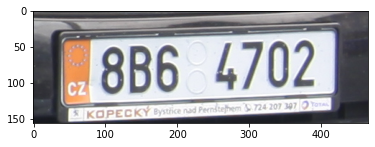

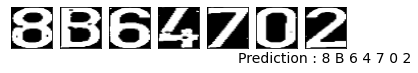

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import cv2
from PIL import Image
from imutils import contours
import os
import glob
import tensorflow as tf
from tensorflow import keras


model = keras.models.load_model('/content/gdrive/MyDrive/VLPR/results/my_model_version1')
# Reading the randomly selected image from the disc and generating predictions

paths = list((glob.glob('/content/gdrive/MyDrive/VLPR/results/analysis/X_test/image_0/*.png')))
paths.sort()
im = [cv2.imread(file) for file in paths]
im = np.array(im)
test_image_pred = im

# List of predictions  
new = test_image_pred
new = new.astype('float64') / 255.0
if new.shape[0] != 0:
    final_pred = model.predict(new)
    pred_list = final_pred

# Variable name to iterate over folders
    
loop_var = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 
            'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'z']

# Variable Mapping for Inverse Label Encoding

refined_loop_var = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 
            'K', 'L', 'M', 'N', 'O', 'P', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Z']

# Saving the encoding information in the dataframe

loop_map = pd.DataFrame()
loop_map['key'] = np.arange(0, 34)
loop_map['value'] = refined_loop_var

# List of final predictions
pred_list_final = []

# Performing inverse label encoding. Changing integers to characters
for i in range(len(pred_list)):
  result = np.where(pred_list[i] == np.amax(pred_list[i]))
  # print(loop_map['value'][result[0][0]])
  pred_list_final.append(loop_map['value'][result[0][0]])

# print(pred_list_final)

# Visualizing the final results. 9 randomly selected images along with their predictions
# plt.subplot(7, 3, 1)
path = '/content/gdrive/MyDrive/VLPR/dataset/hdr/crop_h2/I00058.png'
img = cv2.imread(path)
imgplot = plt.imshow(img)
plt.show()

for i in range(len(im)):
  plt.subplot(2, 7, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(im[i])
print()
plt.xlabel('Prediction : {}'.format(' '.join(pred_list_final)), fontsize = 14)
plt.show()